In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import numpy as np
import subprocess
# !pip install BeautifulSoup4

from utils.util import *

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
species_names= ['ATHALIANA',
            'CELEGANS',
            'ECOLI',
            'DMELANOGASTER',
            'HUMAN',
            'MGENITALIUM',
            'MOUSE',
            'RAT',
            'SCEREVISIAE',
            'SPOMBE',
            'SARS-COV-2',
            'ZEBRAFISH']

## Load all csv files

In [3]:
dfs = {}

# Loop through file names
for name in species_names:
    # Read CSV file into DataFrame
    df = pd.read_csv("data/summary/"+name+'_SUMMARY.csv')
    
    # Add name column to DataFrame, for furthure reference
    df['name'] = name 
    # Store DataFrame in dictionary with corresponding name
    dfs[name] = df

In [4]:
for key, value in dfs.items():
    print(key)

ATHALIANA
CELEGANS
ECOLI
DMELANOGASTER
HUMAN
MGENITALIUM
MOUSE
RAT
SCEREVISIAE
SPOMBE
SARS-COV-2
ZEBRAFISH


In [5]:
merged_df = pd.concat(dfs.values(), ignore_index=True) 
merged_df.count()

job_name      161746
region        161746
job_id        161746
n_res         161746
job_id_c50    161746
c_50          161746
job_id_c70    161746
c_70          161746
uniprot       161746
seq_len       161746
gene          160700
organism      161746
short_name    161746
long_name     161310
seq           161733
name          161746
dtype: int64

There are some protein sequences are missing 

## preprocessing
### drop row which doesn't have a uniprot ID  or the protein sequence is missing

In [6]:
# Drop rows where the specified column has missing values
merged_df = merged_df.dropna(subset=["job_id","uniprot","seq"])


In [7]:
merged_df

,job_name,region,job_id,n_res,job_id_c50,c_50,job_id_c70,c_70,uniprot,seq_len,gene,organism,short_name,long_name,seq,name
0,AF-A0A0A7EPL0-F1,1-847,4a89898a0e01aa2,847,f4790b75aea70ac,359,796db15d14b602b,328,A0A0A7EPL0,847,PIAL1 EMB3001 At1g08910 F7G19.21,Arabidopsis thaliana,PIAL1_ARATH,E4 SUMO-protein ligase PIAL1,MVIPATSRFGFRAEFNTKEFQASCISLANEIDAAIGRNEVPGNIQE...,ATHALIANA
1,AF-A0A140JWM8-F1,1-473,791a3aa3290c0c7,473,6cf0785dbb7113,471,9967d50603cf39f,465,A0A140JWM8,473,CYP716A2 At5g36130/At5g36140 MAB16.8/MAB16.9,Arabidopsis thaliana,C7162_ARATH,Cytochrome P450 716A2,MYLTIIFLFISSIIFPLLFFLGKHLSNFRYPNLPPGKIGFPLIGET...,ATHALIANA
2,AF-A0A178U7J2-F1,1-385,fc121696642996a,385,b139940d5ea7975,326,63d86329bb21772,277,A0A178U7J2,385,atp6,Arabidopsis thaliana,A0A178U7J2_ARATH,ATP synthase subunit a,MRRIFLFDENSLNSSSTIDTSSASTIDTSFASQCTNFSSGQASGTQ...,ATHALIANA
3,AF-A0A178U9T0-F1,1-74,314227958ba5c12,74,1e41eb16864af,72,4c5ea5ec6e177b9,40,A0A178U9T0,74,PROSCOOP16 SCOOP16 At5g36907 MLF18,Arabidopsis thaliana,SOP16_ARATH,Serine rich endogenous peptide 16,MATKISHLVSLLLSLLLLLLFISSQVGFTEAKRDERKKMSSPPIPS...,ATHALIANA
4,AF-A0A178UFC4-F1,1-113,586eba8d8c92a50,113,8d05acceb8b2eec,94,806f343b223970c,33,A0A178UFC4,113,At5g65613 AT5G65613,Arabidopsis thaliana,A0A178UFC4_ARATH,Uncharacterized protein,MDRVLADNRRQSYSTGRCLSSPLSCLIHTEETEYARISNHNNKTRP...,ATHALIANA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161741,AF-X1WHZ7-F1,1-595,27a98fe906c3ca9,595,15be83ad072b02e,346,4e19697e2b5b157,317,A0A8M9PNY8; F1Q9W7.1 (obsolete); X1WHZ7.1 (obs...,595,chrm3a,Danio rerio,-,Muscarinic acetylcholine receptor;Muscarinic a...,MDSNSTELGHFSPSDTLGVGMYPASTLWPLLQNTSLVNLTAVFKLN...,ZEBRAFISH
161742,AF-X1WI01-F1,1-1355,64e9c2d00c9ec24,1355,ba33f84c29e5884,1171,d6be7e7a12ea458,997,A0A8M2BG29; X1WI01.1 (obsolete);UPI0003836FBB,1355,igfn1.3,Danio rerio,-,Immunoglobulin-like and fibronectin type III d...,MKFTKSKEEEPTAPGQVAIKKRSKVPGVMITQFVQEIPAGKSHPDF...,ZEBRAFISH
161743,AF-X1WI05-F1,1-110,2f6bb5d361a5976,110,8739c6669c22545,93,847c3c5b08b9272,33,X1WI05,110,si:dkey-56f14.4 fxyd7,Danio rerio,X1WI05_DANRE,FXYD domain-containing ion transport regulator,MEASTGSYTHLDQSAFHYDYETLRTTGVILAVVMFVSGILIALNLV...,ZEBRAFISH
161744,AF-X1WI09-F1,1-116,9b752477ca75d54,116,62ed8124ec41c54,113,a7875c25c9ecdff,107,X1WI09.1 (obsolete);UPI0003E760F7,116,si:ch73-265h17.5,Danio rerio,-,Si:ch73-265h17.5 (Fragment),DPAAPELQQDLLLPLVSLQKTSGCWELDAALAAVFGKTKDELTNQK...,ZEBRAFISH


### check if there are aggregation score database for each protein, if not drop it

In [8]:

# # Define the directory where the CSV files are located
# directory = "data/score/"

# rows_to_drop = []
# print("Start checking for missing files...\n")
# for index, row in merged_df.iterrows():
#     job_name = row['job_name']
#     name = row['name']
    
#     # Construct the file path
#     file_path = os.path.join(directory, (name+'_scores').upper() , f"{job_name}.csv")
    
#     # Check if the file exists
#     if not os.path.exists(file_path):
#         # If the file does not exist, add the index to the list of rows to drop
#         print("Row with index:", index, ", job_name:", job_name, ", species:", name, ", is dropped because ", file_path, " does not exist.")
#         rows_to_drop.append(index)
#     else:
#         # Check if the file is empty
#         if os.path.getsize(file_path) == 0:
#             # If the file is empty, add the index to the list of rows to drop
#             print("Row with index:", index, ", job_name:", job_name, ", species:", name, ", is dropped because is empty.")
#             rows_to_drop.append(index)

# print("\nFinished checking for missing files.")
# print("Dropped", len(rows_to_drop), "rows.")

# # Drop rows where the corresponding CSV file does not exist
# merged_df = merged_df.drop(rows_to_drop)


## EDA

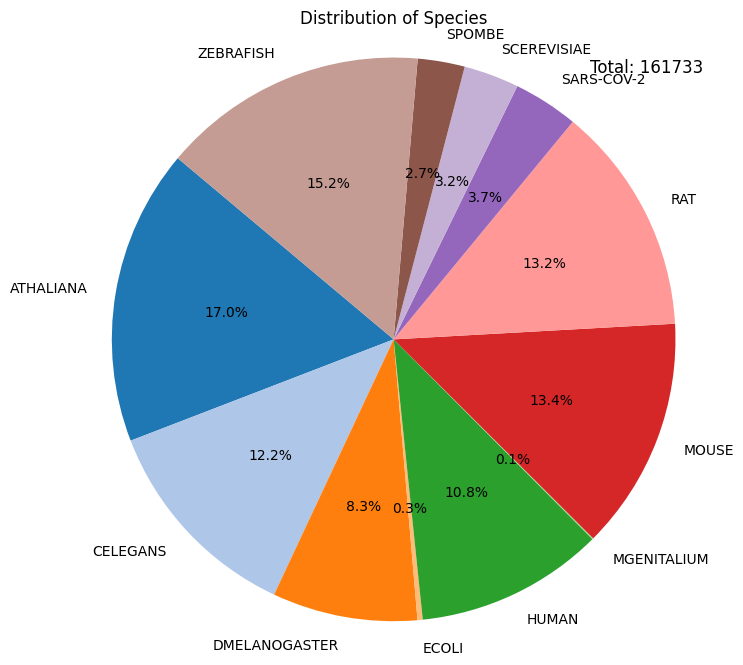

In [9]:
species_counts = merged_df.groupby('name').size()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Species')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add total number of rows as annotation
total_rows = len(merged_df)
plt.annotate(f'Total: {total_rows}', xy=(1.1, 1), fontsize=12, ha='right', va='top')

plt.show()

In [10]:
merged_df

,job_name,region,job_id,n_res,job_id_c50,c_50,job_id_c70,c_70,uniprot,seq_len,gene,organism,short_name,long_name,seq,name
0,AF-A0A0A7EPL0-F1,1-847,4a89898a0e01aa2,847,f4790b75aea70ac,359,796db15d14b602b,328,A0A0A7EPL0,847,PIAL1 EMB3001 At1g08910 F7G19.21,Arabidopsis thaliana,PIAL1_ARATH,E4 SUMO-protein ligase PIAL1,MVIPATSRFGFRAEFNTKEFQASCISLANEIDAAIGRNEVPGNIQE...,ATHALIANA
1,AF-A0A140JWM8-F1,1-473,791a3aa3290c0c7,473,6cf0785dbb7113,471,9967d50603cf39f,465,A0A140JWM8,473,CYP716A2 At5g36130/At5g36140 MAB16.8/MAB16.9,Arabidopsis thaliana,C7162_ARATH,Cytochrome P450 716A2,MYLTIIFLFISSIIFPLLFFLGKHLSNFRYPNLPPGKIGFPLIGET...,ATHALIANA
2,AF-A0A178U7J2-F1,1-385,fc121696642996a,385,b139940d5ea7975,326,63d86329bb21772,277,A0A178U7J2,385,atp6,Arabidopsis thaliana,A0A178U7J2_ARATH,ATP synthase subunit a,MRRIFLFDENSLNSSSTIDTSSASTIDTSFASQCTNFSSGQASGTQ...,ATHALIANA
3,AF-A0A178U9T0-F1,1-74,314227958ba5c12,74,1e41eb16864af,72,4c5ea5ec6e177b9,40,A0A178U9T0,74,PROSCOOP16 SCOOP16 At5g36907 MLF18,Arabidopsis thaliana,SOP16_ARATH,Serine rich endogenous peptide 16,MATKISHLVSLLLSLLLLLLFISSQVGFTEAKRDERKKMSSPPIPS...,ATHALIANA
4,AF-A0A178UFC4-F1,1-113,586eba8d8c92a50,113,8d05acceb8b2eec,94,806f343b223970c,33,A0A178UFC4,113,At5g65613 AT5G65613,Arabidopsis thaliana,A0A178UFC4_ARATH,Uncharacterized protein,MDRVLADNRRQSYSTGRCLSSPLSCLIHTEETEYARISNHNNKTRP...,ATHALIANA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161741,AF-X1WHZ7-F1,1-595,27a98fe906c3ca9,595,15be83ad072b02e,346,4e19697e2b5b157,317,A0A8M9PNY8; F1Q9W7.1 (obsolete); X1WHZ7.1 (obs...,595,chrm3a,Danio rerio,-,Muscarinic acetylcholine receptor;Muscarinic a...,MDSNSTELGHFSPSDTLGVGMYPASTLWPLLQNTSLVNLTAVFKLN...,ZEBRAFISH
161742,AF-X1WI01-F1,1-1355,64e9c2d00c9ec24,1355,ba33f84c29e5884,1171,d6be7e7a12ea458,997,A0A8M2BG29; X1WI01.1 (obsolete);UPI0003836FBB,1355,igfn1.3,Danio rerio,-,Immunoglobulin-like and fibronectin type III d...,MKFTKSKEEEPTAPGQVAIKKRSKVPGVMITQFVQEIPAGKSHPDF...,ZEBRAFISH
161743,AF-X1WI05-F1,1-110,2f6bb5d361a5976,110,8739c6669c22545,93,847c3c5b08b9272,33,X1WI05,110,si:dkey-56f14.4 fxyd7,Danio rerio,X1WI05_DANRE,FXYD domain-containing ion transport regulator,MEASTGSYTHLDQSAFHYDYETLRTTGVILAVVMFVSGILIALNLV...,ZEBRAFISH
161744,AF-X1WI09-F1,1-116,9b752477ca75d54,116,62ed8124ec41c54,113,a7875c25c9ecdff,107,X1WI09.1 (obsolete);UPI0003E760F7,116,si:ch73-265h17.5,Danio rerio,-,Si:ch73-265h17.5 (Fragment),DPAAPELQQDLLLPLVSLQKTSGCWELDAALAAVFGKTKDELTNQK...,ZEBRAFISH


In [11]:
merged_df['name'].value_counts()

name
ATHALIANA        27434
ZEBRAFISH        24664
MOUSE            21615
RAT              21270
CELEGANS         19694
HUMAN            17490
DMELANOGASTER    13458
SARS-COV-2        6039
SCEREVISIAE       5128
SPOMBE            4363
ECOLI              483
MGENITALIUM         95
Name: count, dtype: int64

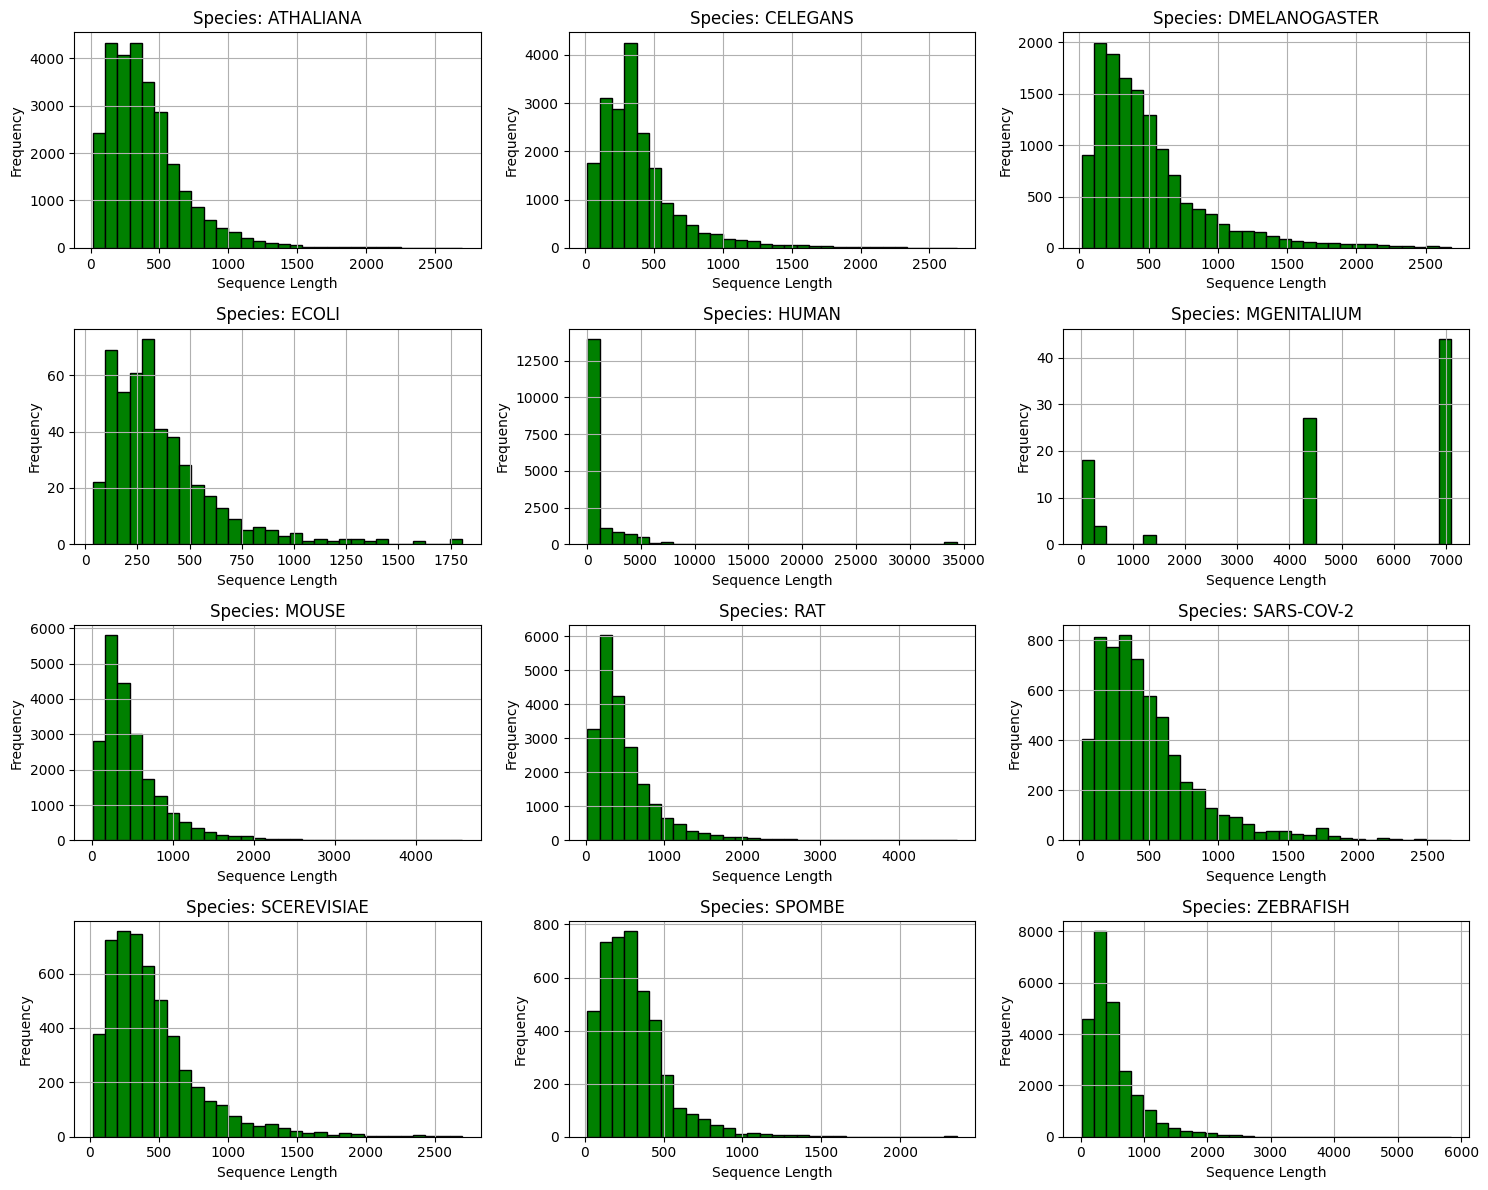

In [12]:
grouped_df = merged_df.groupby('name')

# Create subplots with a layout of 4x3
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each group and plot histogram for each species
for i, (name, group) in enumerate(grouped_df):
    ax = axes[i]  # Get the current axis
    ax.hist(group['seq_len'], bins=30, color='green', edgecolor='black')  # Adjust number of bins as needed
    ax.set_title(f'Species: {name}')
    ax.set_xlabel('Sequence Length')
    ax.set_ylabel('Frequency')
    # ax.set_ylim(0, 5000)  # Adjust y-axis limits as needed
    ax.grid(True)

# Hide empty subplots if the number of species is less than 12
for j in range(len(grouped_df), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Most species, the maximum length of protein is 2500, except human with maximum length of 35000.

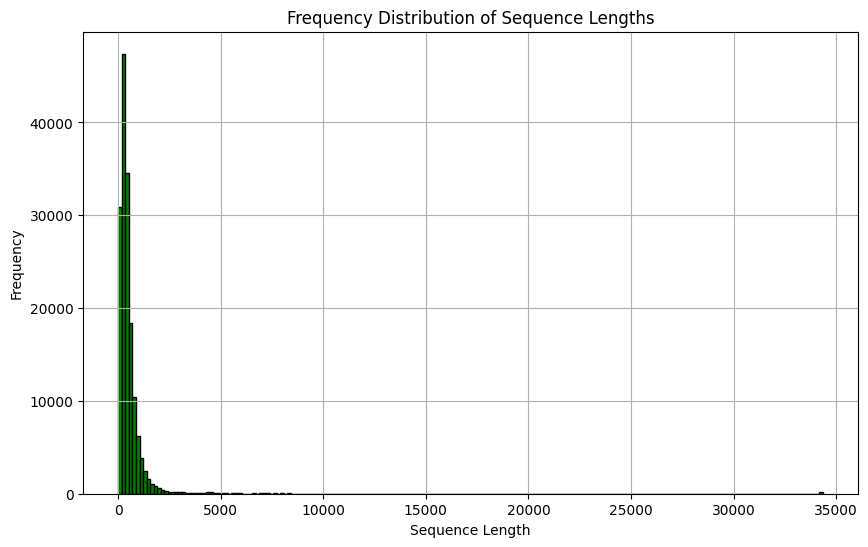

In [13]:
# Plot histogram of sequence lengths
plt.figure(figsize=(10, 6))
plt.hist(merged_df['seq_len'], bins=200, color='green', edgecolor='black')  # Adjust number of bins as needed
plt.title('Frequency Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

We see that the length distribution of the all protein sequences is right-skewed. There are really few sequences that have really long sequences.
Let's use a threshold of 1000 to discard longer sequence.

In [14]:
print("The maximum length of protein is:", merged_df['seq_len'].max())

The maximum length of protein is: 34350


## chhose only sequence with maximum length of a threshold (set to 1000) as we'll feed to our model with max_legnth 1000

In [15]:
# Set the value of the threshold
min_len = 50
max_len = 1000

merged_df= merged_df[(merged_df['seq_len']>=min_len) & (merged_df['seq_len']<=max_len)]

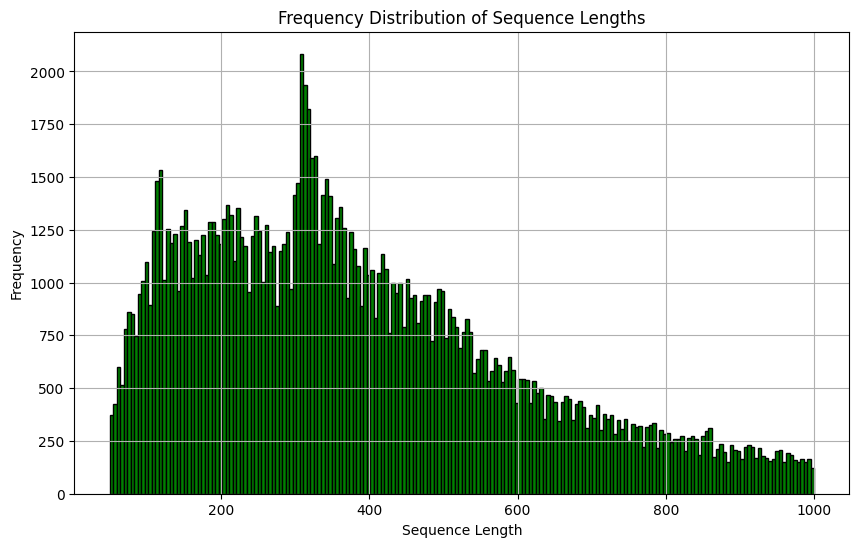

In [16]:
# Plot histogram of sequence lengths
plt.figure(figsize=(10, 6))
plt.hist(merged_df['seq_len'], bins=200, color='green', edgecolor='black')  # Adjust number of bins as needed
plt.title('Frequency Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

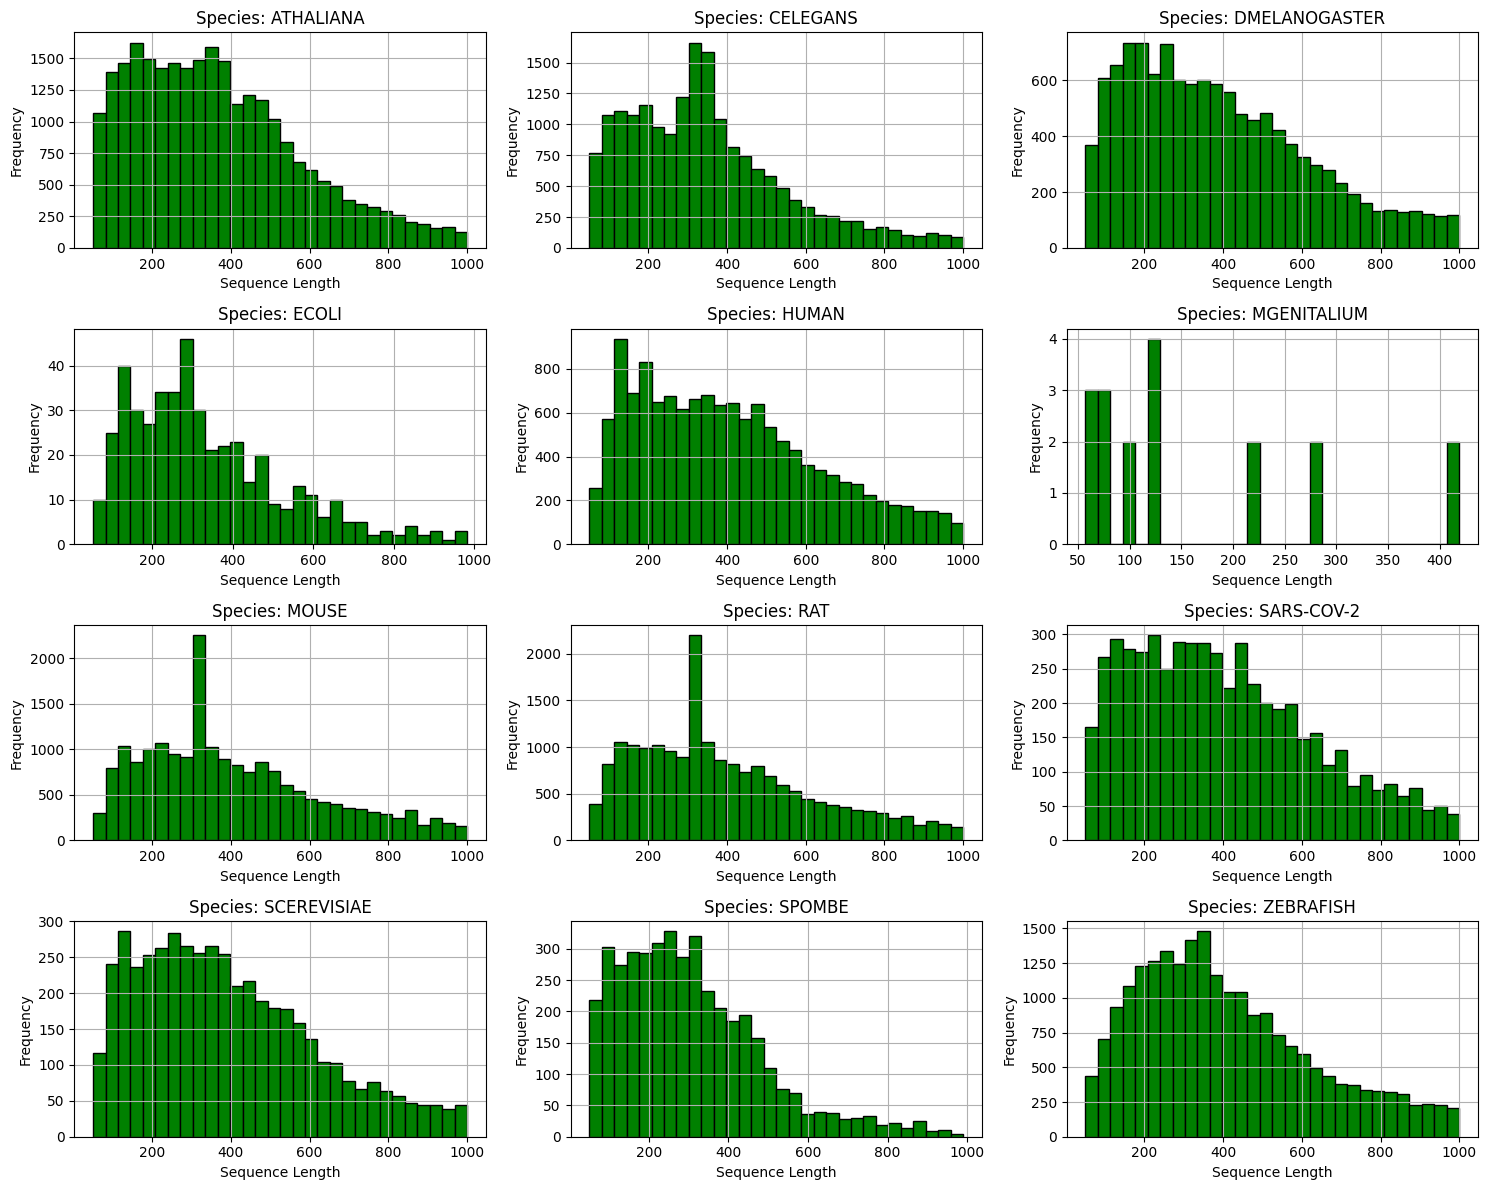

In [17]:
grouped_df = merged_df.groupby('name')

# Create subplots with a layout of 4x3
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Iterate over each group and plot histogram for each species
for i, (name, group) in enumerate(grouped_df):
    ax = axes[i]  # Get the current axis
    ax.hist(group['seq_len'], bins=30, color='green', edgecolor='black')  # Adjust number of bins as needed
    ax.set_title(f'Species: {name}')
    ax.set_xlabel('Sequence Length')
    ax.set_ylabel('Frequency')
    ax.grid(True)

# Hide empty subplots if the number of species is less than 12
for j in range(len(grouped_df), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [18]:
merged_df.rename(columns={'job_name': 'ID', 'seq': 'Sequence', 'job_id': 'Description'}, inplace=True)
merged_df


/var/folders/p2/fwc789ys2kq47g2b6xszvm240000gn/T/ipykernel_78540/2630230403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.rename(columns={'job_name': 'ID', 'seq': 'Sequence', 'job_id': 'Description'}, inplace=True)


,ID,region,Description,n_res,job_id_c50,c_50,job_id_c70,c_70,uniprot,seq_len,gene,organism,short_name,long_name,Sequence,name
0,AF-A0A0A7EPL0-F1,1-847,4a89898a0e01aa2,847,f4790b75aea70ac,359,796db15d14b602b,328,A0A0A7EPL0,847,PIAL1 EMB3001 At1g08910 F7G19.21,Arabidopsis thaliana,PIAL1_ARATH,E4 SUMO-protein ligase PIAL1,MVIPATSRFGFRAEFNTKEFQASCISLANEIDAAIGRNEVPGNIQE...,ATHALIANA
1,AF-A0A140JWM8-F1,1-473,791a3aa3290c0c7,473,6cf0785dbb7113,471,9967d50603cf39f,465,A0A140JWM8,473,CYP716A2 At5g36130/At5g36140 MAB16.8/MAB16.9,Arabidopsis thaliana,C7162_ARATH,Cytochrome P450 716A2,MYLTIIFLFISSIIFPLLFFLGKHLSNFRYPNLPPGKIGFPLIGET...,ATHALIANA
2,AF-A0A178U7J2-F1,1-385,fc121696642996a,385,b139940d5ea7975,326,63d86329bb21772,277,A0A178U7J2,385,atp6,Arabidopsis thaliana,A0A178U7J2_ARATH,ATP synthase subunit a,MRRIFLFDENSLNSSSTIDTSSASTIDTSFASQCTNFSSGQASGTQ...,ATHALIANA
3,AF-A0A178U9T0-F1,1-74,314227958ba5c12,74,1e41eb16864af,72,4c5ea5ec6e177b9,40,A0A178U9T0,74,PROSCOOP16 SCOOP16 At5g36907 MLF18,Arabidopsis thaliana,SOP16_ARATH,Serine rich endogenous peptide 16,MATKISHLVSLLLSLLLLLLFISSQVGFTEAKRDERKKMSSPPIPS...,ATHALIANA
4,AF-A0A178UFC4-F1,1-113,586eba8d8c92a50,113,8d05acceb8b2eec,94,806f343b223970c,33,A0A178UFC4,113,At5g65613 AT5G65613,Arabidopsis thaliana,A0A178UFC4_ARATH,Uncharacterized protein,MDRVLADNRRQSYSTGRCLSSPLSCLIHTEETEYARISNHNNKTRP...,ATHALIANA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161739,AF-X1WHY8-F1,1-341,bac0a290ca74df5,341,86b016641eb2474,315,62e4634f832c5d1,279,X1WHY8,341,si:dkey-42l23.4,Danio rerio,X1WHY8_DANRE,N-formyl peptide receptor 3-like,MYQGLLWYKTNYRSAQTRRRNKIKTRLLPLHLKNMENSSFGLKNVT...,ZEBRAFISH
161741,AF-X1WHZ7-F1,1-595,27a98fe906c3ca9,595,15be83ad072b02e,346,4e19697e2b5b157,317,A0A8M9PNY8; F1Q9W7.1 (obsolete); X1WHZ7.1 (obs...,595,chrm3a,Danio rerio,-,Muscarinic acetylcholine receptor;Muscarinic a...,MDSNSTELGHFSPSDTLGVGMYPASTLWPLLQNTSLVNLTAVFKLN...,ZEBRAFISH
161743,AF-X1WI05-F1,1-110,2f6bb5d361a5976,110,8739c6669c22545,93,847c3c5b08b9272,33,X1WI05,110,si:dkey-56f14.4 fxyd7,Danio rerio,X1WI05_DANRE,FXYD domain-containing ion transport regulator,MEASTGSYTHLDQSAFHYDYETLRTTGVILAVVMFVSGILIALNLV...,ZEBRAFISH
161744,AF-X1WI09-F1,1-116,9b752477ca75d54,116,62ed8124ec41c54,113,a7875c25c9ecdff,107,X1WI09.1 (obsolete);UPI0003E760F7,116,si:ch73-265h17.5,Danio rerio,-,Si:ch73-265h17.5 (Fragment),DPAAPELQQDLLLPLVSLQKTSGCWELDAALAAVFGKTKDELTNQK...,ZEBRAFISH


In [19]:
merged_df.count()

ID             145306
region         145306
Description    145306
n_res          145306
job_id_c50     145306
c_50           145306
job_id_c70     145306
c_70           145306
uniprot        145306
seq_len        145306
gene           144374
organism       145306
short_name     145306
long_name      144916
Sequence       145306
name           145306
dtype: int64

In [20]:
merged_df = merged_df.sample(frac=0.2, random_state=42)
merged_df

,ID,region,Description,n_res,job_id_c50,c_50,job_id_c70,c_70,uniprot,seq_len,gene,organism,short_name,long_name,Sequence,name
82464,AF-O35111-F1,1-409,d38849b3a70d412,409,9342bf76dfa0dee,280,3a5cbb2ff66429f,267,O35111,409,Kcnk3 Ctbak Task Task1,Mus musculus,KCNK3_MOUSE,Potassium channel subfamily K member 3,MKRQNVRTLALIVCTFTYLLVGAAVFDALESEPEMIERQRLELRQL...,MOUSE
52212,AF-Q7K3Y9-F1,1-873,ae35a9559160124,873,ea8fda7e19e2458,736,297c0ef59f4fe2a,629,Q7K3Y9,873,Dmel\CG17739 anon-WO0153538.35 CT39321 CG17739...,Drosophila melanogaster,Q7K3Y9_DROME,Spondin-1,MKALEGFTILLALVGVIPRIEGCIRVPPGVTAAKSPVDDNYVLSVN...,DMELANOGASTER
153847,AF-F1R8N0-F1,1-323,75c61653fe6148f,323,be6050c65133939,320,ede5c7c92e4d9ff,285,F1R8N0.1 (obsolete);UPI0001A2C52E,323,tor1l1,Danio rerio,-,Torsin,MRARHCMIVLLLGCNITFSLGFLDVVVAVASHVFDKLFKTDGLLPF...,ZEBRAFISH
35637,AF-P90830-F1,1-781,26bd3402974203b,781,2af2ec957a1aca,627,c89ed7563b2511,542,P90830,781,CELE_F10C2.5 F10C2.5,Caenorhabditis elegans,P90830_CAEEL,alpha-12-Mannosidase,MITRKAIFFLALASIIQASDDSEAPDNKKSSIRFTPSVIDSYREKV...,CELEGANS
3876,AF-F4J7T4-F1,1-124,663e487da9e8c3e,124,62cdeb1497d0482,108,578ad371eef11c4,44,F4J7T4,124,VAMP728 ATVAMP728 At3g24890 AT3G24890,Arabidopsis thaliana,F4J7T4_ARATH,Vesicle-associated membrane protein 728,MVVDRNGYNYLTQQLEQRVLVLLAHPEEISKLAKVKALVTKMKGVM...,ATHALIANA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,AF-Q9SFC3-F1,1-74,8d5bf185f27f6bc,74,1a99150d34f07e9,72,8163efb5f1276b2,60,Q9SFC3,74,F17A17.25 AT3G07910,Arabidopsis thaliana,Q9SFC3_ARATH,AT3g07910/F17A17_25,MAKNSCLAKITAGVAVGGALGGAVGAVYGTYEAIRVKVPGLHKVRF...,ATHALIANA
13611,AF-Q8LGA5-F1,1-368,f341cac383d2b78,368,da7732038ae74d7,222,39ab014fd155a96,106,Q8LGA5,368,ATL31 CNI1 SSV1 At5g27420 F21A20.130,Arabidopsis thaliana,ATL31_ARATH,E3 ubiquitin-protein ligase ATL31,MDPIKHISLPVLVLFLLLSVSAGQPGTPDQRHDPYAYSGSLSPAMA...,ATHALIANA
61157,AF-A0A087WV53-F1,1-239,348f0682401d331,238,bbcdb2faec3147e,31,b8e806f6f25ade1,48,A0A087WV53,238,SPEGNB,Homo sapiens,SPEGN_HUMAN,SPEG neighbor protein,MSKAAPAKKPVAVAPAPGCTLDINDPQVQSAAIRIQASYRGHRSRK...,HUMAN
131386,AF-P0C268-F1,1-59,da65066ceaf7d1d,59,e9e60ce313834ef,58,77e0bc844d11695,32,P0C268,59,YBL039W-B,Saccharomyces cerevisiae,YB39B_YEAST,Uncharacterized protein YBL039W-B,MGFFNNNPVIEFFHRITRKPSTIAMWVFAGLICSSTFYLMFMSSPT...,SARS-COV-2


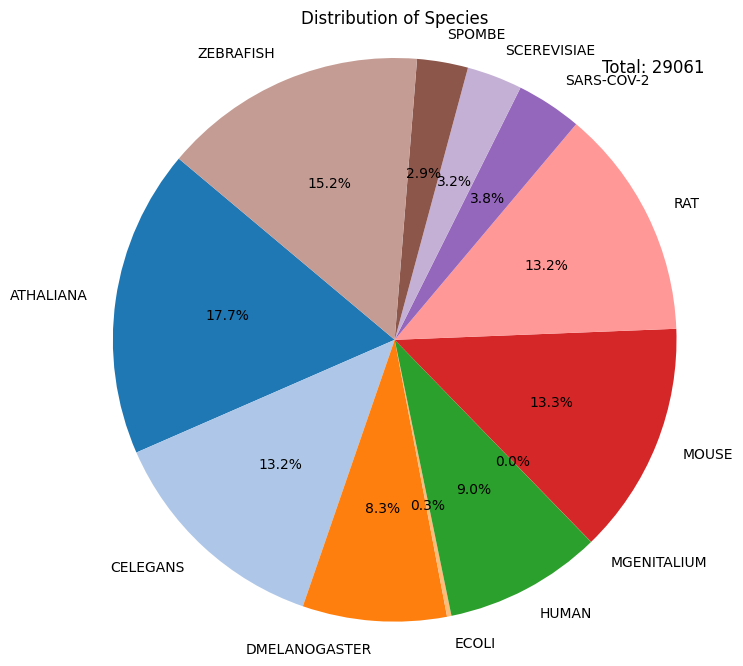

In [21]:
species_counts = merged_df.groupby('name').size()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Species')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add total number of rows as annotation
total_rows = len(merged_df)
plt.annotate(f'Total: {total_rows}', xy=(1.1, 1), fontsize=12, ha='right', va='top')

plt.show()

## Convert dataframe to fasta for clustering

In [22]:
import pandas as pd
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

def dataframe_to_fasta(df, id_col, seq_col, desc_col, output_file):
    """
    Converts a pandas DataFrame to a FASTA file.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the sequence data.
    id_col (str): The column name for sequence IDs.
    seq_col (str): The column name for sequences.
    desc_col (str): The column name for descriptions.
    output_file (str): The output FASTA file path.
    """
    # Convert DataFrame to a list of SeqRecord objects
    records = []
    for index, row in df.iterrows():
        seq_record = SeqRecord(Seq(row[seq_col]), id=row[id_col], description=row[desc_col])
        records.append(seq_record)
    
    # Write the SeqRecord objects to a FASTA file
    with open(output_file, 'w') as output_handle:
        SeqIO.write(records, output_handle, 'fasta')
    
    print(f"FASTA file has been created at {output_file}")
    
def fasta_to_dataframe(fasta_file):
    """
    Converts a FASTA file to a pandas DataFrame.
    
    Parameters:
    fasta_file (str): The path to the FASTA file.
    
    Returns:
    pd.DataFrame: A DataFrame with columns 'ID', 'Sequence', and 'Description'.
    """
    # Read the FASTA file
    records = list(SeqIO.parse(fasta_file, 'fasta'))
    
    # Extract data and create DataFrame
    data = {
        'ID': [record.id for record in records],
        'Sequence': [str(record.seq) for record in records],
        'Description': [' '.join(record.description.split()[1:]) for record in records]
    }
    df = pd.DataFrame(data)
    
    return df



## Using MMseqs to reduce sequence redundancy with maximum identity of 60%

In [23]:
def run_mmseqs_easy_cluster(input_fasta, output_path, max_id):
    command = [
        "mmseqs", "easy-cluster", input_fasta, output_path, "tmp", 
        "--min-seq-id",  "0.6" , "--cov-mode", "1", "-c", "0.8"
    ]

    try:
        # Use subprocess.Popen to execute the command
        process = subprocess.Popen(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)

        # Capture the output and error messages
        stdout, stderr = process.communicate()

        # Check if the process exited with a non-zero status
        if process.returncode != 0:
            error_message = stderr.decode('utf-8')
            print(f"Error occurred: {error_message}")
            return error_message
        else:
            success_message = "Command executed successfully"
            print(success_message)
            return success_message

    except Exception as e:
        exception_message = str(e)
        print(f"An exception occurred: {exception_message}")
        return exception_message



In [24]:
# ## convert to fasta
# dataframe_to_fasta(merged_df,'ID', 'Sequence', 'Description',"data/fasta/DB.fasta")

# # run mmseqs
# input_fasta = "data/fasta/DB.fasta"
# output_path = "data/fasta/DB_clst"

# run_mmseqs_easy_cluster(input_fasta, output_path, 0.6)

# back to df
# fasta_file_path = "data/fasta/DB_clst_rep_seq.fasta" 
# df60_uniprot = fasta_to_dataframe(fasta_file_path)


## if case mmseqs above
df60_uniprot = merged_df.copy()

In [25]:
df60_uniprot

,ID,region,Description,n_res,job_id_c50,c_50,job_id_c70,c_70,uniprot,seq_len,gene,organism,short_name,long_name,Sequence,name
82464,AF-O35111-F1,1-409,d38849b3a70d412,409,9342bf76dfa0dee,280,3a5cbb2ff66429f,267,O35111,409,Kcnk3 Ctbak Task Task1,Mus musculus,KCNK3_MOUSE,Potassium channel subfamily K member 3,MKRQNVRTLALIVCTFTYLLVGAAVFDALESEPEMIERQRLELRQL...,MOUSE
52212,AF-Q7K3Y9-F1,1-873,ae35a9559160124,873,ea8fda7e19e2458,736,297c0ef59f4fe2a,629,Q7K3Y9,873,Dmel\CG17739 anon-WO0153538.35 CT39321 CG17739...,Drosophila melanogaster,Q7K3Y9_DROME,Spondin-1,MKALEGFTILLALVGVIPRIEGCIRVPPGVTAAKSPVDDNYVLSVN...,DMELANOGASTER
153847,AF-F1R8N0-F1,1-323,75c61653fe6148f,323,be6050c65133939,320,ede5c7c92e4d9ff,285,F1R8N0.1 (obsolete);UPI0001A2C52E,323,tor1l1,Danio rerio,-,Torsin,MRARHCMIVLLLGCNITFSLGFLDVVVAVASHVFDKLFKTDGLLPF...,ZEBRAFISH
35637,AF-P90830-F1,1-781,26bd3402974203b,781,2af2ec957a1aca,627,c89ed7563b2511,542,P90830,781,CELE_F10C2.5 F10C2.5,Caenorhabditis elegans,P90830_CAEEL,alpha-12-Mannosidase,MITRKAIFFLALASIIQASDDSEAPDNKKSSIRFTPSVIDSYREKV...,CELEGANS
3876,AF-F4J7T4-F1,1-124,663e487da9e8c3e,124,62cdeb1497d0482,108,578ad371eef11c4,44,F4J7T4,124,VAMP728 ATVAMP728 At3g24890 AT3G24890,Arabidopsis thaliana,F4J7T4_ARATH,Vesicle-associated membrane protein 728,MVVDRNGYNYLTQQLEQRVLVLLAHPEEISKLAKVKALVTKMKGVM...,ATHALIANA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,AF-Q9SFC3-F1,1-74,8d5bf185f27f6bc,74,1a99150d34f07e9,72,8163efb5f1276b2,60,Q9SFC3,74,F17A17.25 AT3G07910,Arabidopsis thaliana,Q9SFC3_ARATH,AT3g07910/F17A17_25,MAKNSCLAKITAGVAVGGALGGAVGAVYGTYEAIRVKVPGLHKVRF...,ATHALIANA
13611,AF-Q8LGA5-F1,1-368,f341cac383d2b78,368,da7732038ae74d7,222,39ab014fd155a96,106,Q8LGA5,368,ATL31 CNI1 SSV1 At5g27420 F21A20.130,Arabidopsis thaliana,ATL31_ARATH,E3 ubiquitin-protein ligase ATL31,MDPIKHISLPVLVLFLLLSVSAGQPGTPDQRHDPYAYSGSLSPAMA...,ATHALIANA
61157,AF-A0A087WV53-F1,1-239,348f0682401d331,238,bbcdb2faec3147e,31,b8e806f6f25ade1,48,A0A087WV53,238,SPEGNB,Homo sapiens,SPEGN_HUMAN,SPEG neighbor protein,MSKAAPAKKPVAVAPAPGCTLDINDPQVQSAAIRIQASYRGHRSRK...,HUMAN
131386,AF-P0C268-F1,1-59,da65066ceaf7d1d,59,e9e60ce313834ef,58,77e0bc844d11695,32,P0C268,59,YBL039W-B,Saccharomyces cerevisiae,YB39B_YEAST,Uncharacterized protein YBL039W-B,MGFFNNNPVIEFFHRITRKPSTIAMWVFAGLICSSTFYLMFMSSPT...,SARS-COV-2


## merge with sequence from PDB

In [26]:
def read_txt_to_dataframe(file_path):
    # Read the file into a DataFrame, using the first line as header
    df = pd.read_csv(file_path, sep=r'\s+')
    
    # Replace 'NA' with NaN for proper handling
    # df.replace('NA', pd.nan, inplace=True)

    # Split the PDBchain column into PDB_id and chain
    df[['PDB', 'chain']] = df['PDBchain'].str.extract(r'(\w{4})(.*)')

    # Drop weird row
    rows_to_drop = df[df['chain'].str.len() > 1].index
    df.drop(rows_to_drop, inplace=True)
    # df.drop(columns=['PDBchain'], inplace=True)
    
    return df

In [27]:
df60 = read_txt_to_dataframe("/Users/lyanchhay/Documents/stage/Stage_AIDRUG_2024/stage/data/pisces/data60.txt")

In [28]:
df60

,PDBchain,len,method,resol,rfac,freerfac,PDB,chain
0,5D8VA,83,XRAY,0.48,0.072,0.078,5D8V,A
1,3NIRA,46,XRAY,0.48,0.127,NaN,3NIR,A
2,5NW3A,54,XRAY,0.59,0.135,0.146,5NW3,A
3,1UCSA,64,XRAY,0.62,0.139,0.155,1UCS,A
4,3X2MA,180,XRAY,0.64,0.122,0.129,3X2M,A
...,...,...,...,...,...,...,...,...
24668,2FXOA,129,XRAY,2.50,0.277,0.349,2FXO,A
24669,3N7XA,329,XRAY,2.50,0.278,0.285,3N7X,A
24670,1MDAH,368,XRAY,2.50,0.285,NaN,1MDA,H
24671,2PL2A,217,XRAY,2.50,0.286,NaN,2PL2,A


In [29]:
# Convert the list of dictionaries to a pandas DataFrame
df60_pdb = fasta_to_dataframe("/Users/lyanchhay/Documents/stage/Stage_AIDRUG_2024/stage/data/pisces/data60.fasta.txt")
df60_pdb['seq_len'] = df60_pdb['Sequence'].apply(len)
# Set the value of the threshold
min_len = 50
max_len = 1000

df60_pdb = df60_pdb[(df60_pdb['seq_len']>=min_len) & (df60_pdb['seq_len']<=max_len)]


In [30]:
df60_pdb

,ID,Sequence,Description,seq_len
0,5D8VA,AAPANAVTADDPTAIALKYNQDATKSERVAAARPGLPPEEQHCANC...,92116E4FD2C44E0A 83 XRAY 0.480 0.072 0.078 NAC...,83
2,5NW3A,MAKWVCKICGYIYDEDAGDPDNGISPGTKFEELPDDWVCPICGAPK...,7181BBB4A3E8B1A8 54 XRAY 0.590 0.135 0.146 NAC...,54
3,1UCSA,NKASVVANQLIPINTALTLIMMKAEVVTPMGIPAEEIPKLVGMQVN...,154C6BE62D913192 64 XRAY 0.620 0.139 0.155 NAC...,64
4,3X2MA,ATGGYVQQATGQASFTMYSGCGSPACGKAASGFTAAINQLAFGSAP...,D693A38CE0E0BC40 180 XRAY 0.640 0.122 0.129 NA...,180
5,2VB1A,KVFGRCELAAAMKRHGLDNYRGYSLGNWVCAAKFESNFNTQATNRN...,601CC8BCCA275EBD 129 XRAY 0.650 0.084 0.095 NA...,129
...,...,...,...,...
24668,2FXOA,GSSPLLKSAEREKEMASMKEEFTRLKEALEKSEARRKELEEKMVSL...,E9476A317E5308F5 129 XRAY 2.500 0.277 0.349 NA...,129
24669,3N7XA,MCADSTRTSPRKRSRRDAHNEDEEHAEGSSGPDPHRCLQFNTGDSI...,B86F5F0FBDF5A2A0 329 XRAY 2.500 0.278 0.285 NA...,329
24670,1MDAH,EKSKVAGSAAAASAAAASDGSSCDHGPGAISRRSHITLPAYFAGTT...,C204449C2CE158C7 368 XRAY 2.500 0.285 NA NACO....,368
24671,2PL2A,MQTAEQNPLRLGVQLYALGRYDAALTLFERALKENPQDPEALYWLA...,C6E5FE443DD2683C 217 XRAY 2.500 0.286 NA NACO....,217


## merge the 2

In [37]:

stacked_df = pd.concat([df60_uniprot,df60_pdb], ignore_index=True)

In [38]:
stacked_df

,ID,region,Description,n_res,job_id_c50,c_50,job_id_c70,c_70,uniprot,seq_len,gene,organism,short_name,long_name,Sequence,name
0,AF-O35111-F1,1-409,d38849b3a70d412,409,9342bf76dfa0dee,280,3a5cbb2ff66429f,267,O35111,409,Kcnk3 Ctbak Task Task1,Mus musculus,KCNK3_MOUSE,Potassium channel subfamily K member 3,MKRQNVRTLALIVCTFTYLLVGAAVFDALESEPEMIERQRLELRQL...,MOUSE
1,AF-Q7K3Y9-F1,1-873,ae35a9559160124,873,ea8fda7e19e2458,736,297c0ef59f4fe2a,629,Q7K3Y9,873,Dmel\CG17739 anon-WO0153538.35 CT39321 CG17739...,Drosophila melanogaster,Q7K3Y9_DROME,Spondin-1,MKALEGFTILLALVGVIPRIEGCIRVPPGVTAAKSPVDDNYVLSVN...,DMELANOGASTER
2,AF-F1R8N0-F1,1-323,75c61653fe6148f,323,be6050c65133939,320,ede5c7c92e4d9ff,285,F1R8N0.1 (obsolete);UPI0001A2C52E,323,tor1l1,Danio rerio,-,Torsin,MRARHCMIVLLLGCNITFSLGFLDVVVAVASHVFDKLFKTDGLLPF...,ZEBRAFISH
3,AF-P90830-F1,1-781,26bd3402974203b,781,2af2ec957a1aca,627,c89ed7563b2511,542,P90830,781,CELE_F10C2.5 F10C2.5,Caenorhabditis elegans,P90830_CAEEL,alpha-12-Mannosidase,MITRKAIFFLALASIIQASDDSEAPDNKKSSIRFTPSVIDSYREKV...,CELEGANS
4,AF-F4J7T4-F1,1-124,663e487da9e8c3e,124,62cdeb1497d0482,108,578ad371eef11c4,44,F4J7T4,124,VAMP728 ATVAMP728 At3g24890 AT3G24890,Arabidopsis thaliana,F4J7T4_ARATH,Vesicle-associated membrane protein 728,MVVDRNGYNYLTQQLEQRVLVLLAHPEEISKLAKVKALVTKMKGVM...,ATHALIANA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53419,2FXOA,NaN,E9476A317E5308F5 129 XRAY 2.500 0.277 0.349 NA...,NaN,NaN,NaN,NaN,NaN,NaN,129,NaN,NaN,NaN,NaN,GSSPLLKSAEREKEMASMKEEFTRLKEALEKSEARRKELEEKMVSL...,NaN
53420,3N7XA,NaN,B86F5F0FBDF5A2A0 329 XRAY 2.500 0.278 0.285 NA...,NaN,NaN,NaN,NaN,NaN,NaN,329,NaN,NaN,NaN,NaN,MCADSTRTSPRKRSRRDAHNEDEEHAEGSSGPDPHRCLQFNTGDSI...,NaN
53421,1MDAH,NaN,C204449C2CE158C7 368 XRAY 2.500 0.285 NA NACO....,NaN,NaN,NaN,NaN,NaN,NaN,368,NaN,NaN,NaN,NaN,EKSKVAGSAAAASAAAASDGSSCDHGPGAISRRSHITLPAYFAGTT...,NaN
53422,2PL2A,NaN,C6E5FE443DD2683C 217 XRAY 2.500 0.286 NA NACO....,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,MQTAEQNPLRLGVQLYALGRYDAALTLFERALKENPQDPEALYWLA...,NaN


## redo mmseqs

In [39]:
dataframe_to_fasta(df60_uniprot,'ID', 'Sequence', 'Description',"data/fasta/df60_merge.fasta")
## mmseq on stack df
# dataframe_to_fasta(stacked_df,'ID', 'Sequence', 'Description',"data/fasta/df60_merge.fasta")

input_fasta = "data/fasta/df60_merge.fasta"
output_path = "data/fasta/df60_final"

run_mmseqs_easy_cluster(input_fasta, output_path, 0.6)

FASTA file has been created at data/fasta/df60_merge.fasta
Command executed successfully


'Command executed successfully'

In [40]:
fasta_file_path = "data/fasta/df60_final_rep_seq.fasta" 

df60 = fasta_to_dataframe(fasta_file_path)

In [41]:
df60

,ID,Sequence,Description
0,AF-Q7K3Y9-F1,MKALEGFTILLALVGVIPRIEGCIRVPPGVTAAKSPVDDNYVLSVN...,ae35a9559160124
1,AF-F1R8N0-F1,MRARHCMIVLLLGCNITFSLGFLDVVVAVASHVFDKLFKTDGLLPF...,75c61653fe6148f
2,AF-P90830-F1,MITRKAIFFLALASIIQASDDSEAPDNKKSSIRFTPSVIDSYREKV...,26bd3402974203b
3,AF-F4J7T4-F1,MVVDRNGYNYLTQQLEQRVLVLLAHPEEISKLAKVKALVTKMKGVM...,663e487da9e8c3e
4,AF-Q8BKU8-F1,MAAACRSEAGLLPSLLCRRPAGAQLLRVALCLLCWVPAAVDAVPEL...,d0129dc8e0a8898
...,...,...,...
23858,AF-B0V2U3-F1,MAERANFGAQRVSRPQGSLPPEPIDIIRTKARSRRVRINVGGLVHE...,705252593b0818b
23859,AF-Q9LSV6-F1,MMMPELPEDLLVEILCRVPATSLKRLRSTCKLWNHLYNDKRFKSKH...,b9c8b3a7edc5937
23860,AF-Q5RJL0-F1,MTDTPVTLSGSECNGDRPPENGQQPSSQTRKTTDADETQTYYGVEP...,a7366b798f42aa5
23861,AF-Q7TQN8-F1,MESSFSFGVILAVLTILIIAVNALVVVAMLLSIYKNDGVGLCFTLN...,7ee72fd6d53d50e


In [42]:
df60[~df60['ID'].str.startswith('AF') ]

,ID,Sequence,Description


## download aggrescan score and pdb files

In [43]:

def download_file_wget(url, output_path, verbose=False):
    """
    Download a file from the given URL using wget and save it to the specified output path.
    
    Args:
        url (str): The URL of the file to download.
        output_path (str): The path where the downloaded file will be saved.
        verbose (bool): Whether to print status messages. Default is True.
        max_retries (int): Maximum number of times to retry downloading on timeout. Default is 3.
        
    Returns:
        bool: True if the download was successful, False otherwise.
    """

    if os.path.exists(output_path) and os.path.getsize(output_path) > 0:
        if verbose:
            print("File already exists at:", output_path)
        return True
    retries = 3

    while retries > 0:
        try:
            if verbose:
                print("Downloading file from:", url)
            wget.download(url, out=output_path)
            return True
        except Exception as e:
            if isinstance(e, KeyboardInterrupt):
                raise e
            elif isinstance(e, (TimeoutError, ConnectionError)):
                if verbose:
                    print("Timeout error occurred. Retrying...")
                retries -= 1
                time.sleep(1)  # Wait for a second before retrying
            else:
                if verbose:
                    print("Error:", str(e))
                return False
    return False

def download_aggrescan_score_files(uniprots , job_ids, 
                        score_file_path= None,
                        max_workers=16):
    """
    This function is used to download the aggrescan3d score files of protein from the Aggrescan3D database 
    based on the job_id from the summary file.
    """
    #create directories if they don't exist
    if score_file_path is None:
        score_file_path = os.path.join(os.getcwd(), 'data/score')
    os.makedirs(score_file_path, exist_ok=True)

    warning_uniprots = []

    score_file_paths = [
        os.path.join(score_file_path, uniprot + '.csv') for uniprot in uniprots
    ]

    template_url = 'https://biocomp.chem.uw.edu.pl/A3D2/compute_static/{}/A3D.csv'
    download_urls = [template_url.format(job_id) for job_id in job_ids]

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_uniprot = {
            executor.submit(download_file_wget, url, path, False): uniprot 
            for url, path, uniprot in zip(download_urls, score_file_paths, uniprots)
        }
        print('Downloading aggrescan score files to {}...'.format(score_file_path))
        for future in tqdm(as_completed(future_to_uniprot), total=len(download_urls)):
            uniprot = future_to_uniprot[future]
            try:
                success = future.result()
                if not success:
                    warning_uniprots.append(uniprot)
            except Exception as e:
                warning_uniprots.append(uniprot)
                print(f"Error downloading file for {uniprot}: {e}")

    return warning_uniprots


def download_aggrescan_pdb_files(uniprots, job_ids, pdb_file_path=None, max_workers=16):
    """
    This function is used to download the Aggrescan3D PDB files of proteins from the Aggrescan3D database 
    based on the job_id from the summary file.
    """
    warning_uniprots = []

    # Create directories if they don't exist
    if pdb_file_path is None:
        pdb_file_path = os.path.join(os.getcwd(), 'data/pdb')
    os.makedirs(pdb_file_path, exist_ok=True)


    pdb_file_paths = [
        os.path.join(pdb_file_path, uniprot + '.pdb') for uniprot in uniprots
    ]

    template_url = 'https://biocomp.chem.uw.edu.pl/A3D2/compute_static/{}/output.pdb'
    download_urls = [template_url.format(job_id) for job_id in job_ids]


    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        future_to_uniprot = {
            executor.submit(download_file_wget, url, path, False): uniprot 
            for url, path, uniprot in zip(download_urls, pdb_file_paths, uniprots)
        }
        print(f'Downloading Aggrescan PDB files to {pdb_file_path}...')
        for future in tqdm(as_completed(future_to_uniprot), total=len(download_urls)):
            uniprot = future_to_uniprot[future]
            try:
                success = future.result()
                if not success:
                    warning_uniprots.append(uniprot)
            except Exception as e:
                warning_uniprots.append(uniprot)
                print(f"Error downloading file for {uniprot}: {e}")

    return warning_uniprots


In [44]:
df = df60.copy()
df_uniprot = df[df['ID'].str.startswith('AF')]
df_pdb = df[~df['ID'].str.startswith('AF')]

uniprots = df_uniprot.ID.tolist()
# job_names = sampled_df.job_name.tolist()
job_ids = df_uniprot.Description.tolist()

warning_uniprots = download_aggrescan_score_files(uniprots, job_ids)
warning_uniprots += download_aggrescan_pdb_files(uniprots, job_ids)

if len(warning_uniprots) > 0:
    print("\nRemove warning uniprots from dataframe:", set(warning_uniprots))
    df_uniprot = df_uniprot[~df_uniprot['ID'].isin(warning_uniprots)]


100%|██████████| 23863/23863 [00:10<00:00, 2226.98it/s]


100%|██████████| 23863/23863 [00:16<00:00, 1447.23it/s]


Remove warning uniprots from dataframe: {'AF-P30177-F1', 'AF-Q9CZN4-F1'}


In [45]:
df_uniprot

,ID,Sequence,Description
0,AF-Q7K3Y9-F1,MKALEGFTILLALVGVIPRIEGCIRVPPGVTAAKSPVDDNYVLSVN...,ae35a9559160124
1,AF-F1R8N0-F1,MRARHCMIVLLLGCNITFSLGFLDVVVAVASHVFDKLFKTDGLLPF...,75c61653fe6148f
2,AF-P90830-F1,MITRKAIFFLALASIIQASDDSEAPDNKKSSIRFTPSVIDSYREKV...,26bd3402974203b
3,AF-F4J7T4-F1,MVVDRNGYNYLTQQLEQRVLVLLAHPEEISKLAKVKALVTKMKGVM...,663e487da9e8c3e
4,AF-Q8BKU8-F1,MAAACRSEAGLLPSLLCRRPAGAQLLRVALCLLCWVPAAVDAVPEL...,d0129dc8e0a8898
...,...,...,...
23858,AF-B0V2U3-F1,MAERANFGAQRVSRPQGSLPPEPIDIIRTKARSRRVRINVGGLVHE...,705252593b0818b
23859,AF-Q9LSV6-F1,MMMPELPEDLLVEILCRVPATSLKRLRSTCKLWNHLYNDKRFKSKH...,b9c8b3a7edc5937
23860,AF-Q5RJL0-F1,MTDTPVTLSGSECNGDRPPENGQQPSSQTRKTTDADETQTYYGVEP...,a7366b798f42aa5
23861,AF-Q7TQN8-F1,MESSFSFGVILAVLTILIIAVNALVVVAMLLSIYKNDGVGLCFTLN...,7ee72fd6d53d50e


## extract score

In [46]:
sampled_df = df_uniprot
sampled_df

,ID,Sequence,Description
0,AF-Q7K3Y9-F1,MKALEGFTILLALVGVIPRIEGCIRVPPGVTAAKSPVDDNYVLSVN...,ae35a9559160124
1,AF-F1R8N0-F1,MRARHCMIVLLLGCNITFSLGFLDVVVAVASHVFDKLFKTDGLLPF...,75c61653fe6148f
2,AF-P90830-F1,MITRKAIFFLALASIIQASDDSEAPDNKKSSIRFTPSVIDSYREKV...,26bd3402974203b
3,AF-F4J7T4-F1,MVVDRNGYNYLTQQLEQRVLVLLAHPEEISKLAKVKALVTKMKGVM...,663e487da9e8c3e
4,AF-Q8BKU8-F1,MAAACRSEAGLLPSLLCRRPAGAQLLRVALCLLCWVPAAVDAVPEL...,d0129dc8e0a8898
...,...,...,...
23858,AF-B0V2U3-F1,MAERANFGAQRVSRPQGSLPPEPIDIIRTKARSRRVRINVGGLVHE...,705252593b0818b
23859,AF-Q9LSV6-F1,MMMPELPEDLLVEILCRVPATSLKRLRSTCKLWNHLYNDKRFKSKH...,b9c8b3a7edc5937
23860,AF-Q5RJL0-F1,MTDTPVTLSGSECNGDRPPENGQQPSSQTRKTTDADETQTYYGVEP...,a7366b798f42aa5
23861,AF-Q7TQN8-F1,MESSFSFGVILAVLTILIIAVNALVVVAMLLSIYKNDGVGLCFTLN...,7ee72fd6d53d50e


In [47]:
sampled_df['sequence'] = [[] for _ in range(len(sampled_df))]
# sampled_df['residue_names'] = [[] for _ in range(len(sampled_df))]
sampled_df['scores'] = [[] for _ in range(len(sampled_df))]

for idx, row in sampled_df.iterrows():
    uniprot = row['ID']
    seq = row['Sequence']
    tmp_df = pd.read_csv('data/score/{}.csv'.format(uniprot))

    residues = tmp_df['residue_name'].tolist()
    scores = tmp_df['score'].tolist()

    assert len(residues) == len(scores), "{} {}: Length of residues and scores are not equal".format(idx,uniprot)

    sampled_df.at[idx, 'sequence'] = ''.join(residues)
    # sampled_df.at[idx, 'residue_names'] = residues
    sampled_df.at[idx, 'scores'] =  scores


In [48]:
## remove some first residue M.

# Determine the number of rows to modify (80% of the total)
num_rows_to_modify = int(0.8 * len(sampled_df))

# Randomly select 90% of the row indices
indices_to_modify = np.random.choice(sampled_df.index, size=num_rows_to_modify, replace=False)

# Modify the selected rows
for idx in indices_to_modify:
    sequence = sampled_df.at[idx, 'sequence']
    # residue_names = sampled_df.at[idx, 'residue_names']
    scores = sampled_df.at[idx, 'scores']

    # Check if the first residue is 'M'
    if sequence[0] == 'M':
        # Remove the first residue and the corresponding score
        sampled_df.at[idx, 'sequence'] = sequence[1:]
        # sampled_df.at[idx, 'residue_names'] = residue_names[1:]
        sampled_df.at[idx, 'scores'] = scores[1:]

In [49]:
sampled_df

,ID,Sequence,Description,sequence,scores
0,AF-Q7K3Y9-F1,MKALEGFTILLALVGVIPRIEGCIRVPPGVTAAKSPVDDNYVLSVN...,ae35a9559160124,KALEGFTILLALVGVIPRIEGCIRVPPGVTAAKSPVDDNYVLSVNG...,"[-0.8217, -0.1922, 0.3744, -0.7553, -0.1138, 2..."
1,AF-F1R8N0-F1,MRARHCMIVLLLGCNITFSLGFLDVVVAVASHVFDKLFKTDGLLPF...,75c61653fe6148f,RARHCMIVLLLGCNITFSLGFLDVVVAVASHVFDKLFKTDGLLPFN...,"[-1.9416, -1.0099, -1.5631, -0.843, 0.746, 1.2..."
2,AF-P90830-F1,MITRKAIFFLALASIIQASDDSEAPDNKKSSIRFTPSVIDSYREKV...,26bd3402974203b,ITRKAIFFLALASIIQASDDSEAPDNKKSSIRFTPSVIDSYREKVQ...,"[1.6788, 0.1714, -1.153, -0.7279, 1.2775, 3.09..."
3,AF-F4J7T4-F1,MVVDRNGYNYLTQQLEQRVLVLLAHPEEISKLAKVKALVTKMKGVM...,663e487da9e8c3e,VVDRNGYNYLTQQLEQRVLVLLAHPEEISKLAKVKALVTKMKGVMM...,"[1.8261, 0.5399, -2.0156, -2.6643, -2.2091, -0..."
4,AF-Q8BKU8-F1,MAAACRSEAGLLPSLLCRRPAGAQLLRVALCLLCWVPAAVDAVPEL...,d0129dc8e0a8898,AAACRSEAGLLPSLLCRRPAGAQLLRVALCLLCWVPAAVDAVPELG...,"[0.6847, 0.3141, -0.0122, -0.3627, -2.0006, -1..."
...,...,...,...,...,...
23858,AF-B0V2U3-F1,MAERANFGAQRVSRPQGSLPPEPIDIIRTKARSRRVRINVGGLVHE...,705252593b0818b,MAERANFGAQRVSRPQGSLPPEPIDIIRTKARSRRVRINVGGLVHE...,"[0.3716, -0.5891, -2.5584, -2.6538, -1.5016, -..."
23859,AF-Q9LSV6-F1,MMMPELPEDLLVEILCRVPATSLKRLRSTCKLWNHLYNDKRFKSKH...,b9c8b3a7edc5937,MMPELPEDLLVEILCRVPATSLKRLRSTCKLWNHLYNDKRFKSKHC...,"[1.7172, 1.3124, -0.0548, -1.4843, -0.7502, -1..."
23860,AF-Q5RJL0-F1,MTDTPVTLSGSECNGDRPPENGQQPSSQTRKTTDADETQTYYGVEP...,a7366b798f42aa5,TDTPVTLSGSECNGDRPPENGQQPSSQTRKTTDADETQTYYGVEPS...,"[-0.4718, -1.4673, -0.6265, 0.471, 1.757, 1.36..."
23861,AF-Q7TQN8-F1,MESSFSFGVILAVLTILIIAVNALVVVAMLLSIYKNDGVGLCFTLN...,7ee72fd6d53d50e,MESSFSFGVILAVLTILIIAVNALVVVAMLLSIYKNDGVGLCFTLN...,"[0.1839, -1.267, -0.7319, 0.2104, 0.8841, 0.86..."


# split data into 90-10 for train/valid/test Kfold cross validation

In [94]:
# from sklearn.model_selection import train_test_split, KFold

# train_valid_set, test_set = train_test_split(sampled_df, test_size=0.1, random_state=42)

# k=5
# # Create K-fold cross validation on the train/valid set
# kf = KFold(n_splits=k, shuffle=True, random_state=42)

# # Add a 'fold' column initialized to -1
# train_valid_set['fold'] = -1
# test_set['fold'] = -1
# train_valid_set['split'] = 'train/valid'
# test_set['split'] = 'test'

# # Assign fold numbers
# for fold, (train_index, valid_index) in enumerate(kf.split(train_valid_set)):
#     train_valid_set.iloc[valid_index, train_valid_set.columns.get_loc('fold')] = int(fold)

# # Combine the train/valid set with the fold column back into df30
# sampled_df = pd.concat([train_valid_set, test_set])

# # Move 'split' column to the beginning
# cols = sampled_df.columns.tolist()
# cols.insert(0, cols.pop(cols.index('split')))
# cols.insert(1, cols.pop(cols.index('fold')))
# sampled_df = sampled_df[cols]

# # Reset the index of df30
# sampled_df = sampled_df.reset_index(drop=True)

# # sampled_df.to_csv(data_dir+'pisces/data30_fold_split.csv', index=False)

# sampled_df

## Fixed split 80-10-10 train valid test set

In [50]:
from sklearn.model_selection import train_test_split, KFold
train_set, temp_set = train_test_split(sampled_df, test_size=0.2, random_state=42)

# Split the temp set into validation (10%) and test (10%) sets
valid_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=42)

train_set['split'] = 'train'
valid_set['split'] = 'valid'
test_set['split'] = 'test'

# Combine the train, validation, and test sets back into df30
sampled_df = pd.concat([train_set, valid_set, test_set])

cols = sampled_df.columns.tolist()
cols.insert(0, cols.pop(cols.index('split')))
sampled_df = sampled_df[cols]

# Reset the index of df30
sampled_df = sampled_df.reset_index(drop=True)


sampled_df

/Users/lyanchhay/miniconda3/envs/mmseqs/lib/python3.9/site-packages/threadpoolctl.py:1214: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


,split,ID,Sequence,Description,sequence,scores
0,train,AF-O18241-F1,MTVSSPSPSIPGPLPKAERALAWSVWIFHSLFAFVIAYWVSNGKAK...,fcdba63bf58ceb6,TVSSPSPSIPGPLPKAERALAWSVWIFHSLFAFVIAYWVSNGKAKG...,"[1.2046, 1.8397, 0.5728, -0.2172, -0.4744, -0...."
1,train,AF-P15384-F1,MTVVPGDHLLEPEAAGGGGGDPPQGGCVSGGGCDRYEPLPPALPAA...,7db4e72e5903c11,MTVVPGDHLLEPEAAGGGGGDPPQGGCVSGGGCDRYEPLPPALPAA...,"[1.413, 1.6845, 2.7227, 2.3815, 0.3687, -1.073..."
2,train,AF-P26440-F1,MAEMATATRLLGWRVASWRLRPPLAGFVSQRAHSLLPVDDAINGLS...,3cb866416747735,AEMATATRLLGWRVASWRLRPPLAGFVSQRAHSLLPVDDAINGLSE...,"[-0.1734, -0.998, 0.1447, 0.2165, 0.1927, -0.3..."
3,train,AF-Q09668-F1,MVKKNTKVSNKYIIDATAAVNDKIFDVAAFEKYLIDRIKVDGKTGN...,45281cdafe0f7e1,VKKNTKVSNKYIIDATAAVNDKIFDVAAFEKYLIDRIKVDGKTGNL...,"[0.7828, -1.7654, -2.7482, -2.616, -1.8659, -1..."
4,train,AF-Q9ZB76-F1,MKYILAIDFGLKKIGTAIANTLDKYPSAFHVFEVKNNFKTAVNNLF...,a270522f1cb90de,KYILAIDFGLKKIGTAIANTLDKYPSAFHVFEVKNNFKTAVNNLFL...,"[-1.3238, -0.8223, 0.0, 0.0, 0.0, 0.0, -0.7284..."
...,...,...,...,...,...,...
23856,test,AF-Q9CQP8-F1,MEESVKPVPKHANHRRSSVRSSLYGDVRDLWSTATMSTANVSVSDV...,6244375a4c9e0b9,EESVKPVPKHANHRRSSVRSSLYGDVRDLWSTATMSTANVSVSDVC...,"[-2.2433, -2.3874, -0.9649, 0.3977, -0.8502, -..."
23857,test,AF-Q19315-F1,MRIKIFMIICLLHKTNAQLARDWSFQEMCNFWGGEKTYHARKDGFK...,987969a9822ddef,RIKIFMIICLLHKTNAQLARDWSFQEMCNFWGGEKTYHARKDGFKS...,"[-0.5983, 1.3771, 0.5329, 3.0519, 4.0737, 4.04..."
23858,test,AF-O62104-F1,MPVDVMEKVMKKVDPYDWISVRNSNRNLRDFVDSQHLKLDIDVSIE...,2d54e99056cdf37,MPVDVMEKVMKKVDPYDWISVRNSNRNLRDFVDSQHLKLDIDVSIE...,"[1.2703, 0.6277, 0.9008, -1.2161, -0.2379, -0...."
23859,test,AF-Q9FUR2-F1,MKTRRGKRPERFWPSIVMNKWLNRKPKVYDFSEDEIDTEPESEDDV...,e37146c742b0384,KTRRGKRPERFWPSIVMNKWLNRKPKVYDFSEDEIDTEPESEDDVC...,"[-1.8861, -2.032, -3.3969, -3.7788, -3.146, -3..."


In [52]:
# Save the DataFrame to a CSV file
save_col= ['split','ID','sequence','scores']
sampled_df[save_col].to_csv("data/pisces/data60_fixed_split.csv", index=False)
# sampled_df.to_csv("data/pisces/data60_fixed_split.csv", index=False)

In [72]:
import os
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset
import re
import sys
from scipy.spatial.distance import cdist
from torch_geometric.data import Data
import ast
from tqdm import tqdm
import pandas as pd
import re
# default values using in training
NEIGHBOUR_RADIUS = 10

def format_pdb(pdb_file):
    '''
    Process pdb file into pandas df
    
    Original author: Alissa Hummer
    
    :param pdb_file: file path of .pdb file to convert
    :returns: df with atomic level info
    '''
    
    pd.options.mode.chained_assignment = None
    pdb_whole = pd.read_csv(pdb_file,header=None,delimiter='\t')
    pdb_whole.columns = ['pdb']
    pdb = pdb_whole[pdb_whole['pdb'].str.startswith('ATOM')]
    pdb['Atom_Num'] = pdb['pdb'].str[6:11].copy()
    pdb['Atom_Name'] = pdb['pdb'].str[11:16].copy()
    pdb['AA'] = pdb['pdb'].str[17:20].copy()
    pdb['Chain'] = pdb['pdb'].str[20:22].copy()
    pdb['Res_Num'] = pdb['pdb'].str[22:27].copy().str.strip()
    pdb['x'] = pdb['pdb'].str[27:38].copy()
    pdb['y'] = pdb['pdb'].str[38:46].copy()
    pdb['z'] = pdb['pdb'].str[46:54].copy()#
    pdb['bfactor'] = pdb['pdb'].str[60:66].copy()#
    pdb['Atom_type'] = pdb['pdb'].str[77].copy()
    pdb.drop('pdb',axis=1,inplace=True)
    pdb.replace({' ':''}, regex=True, inplace=True)
    pdb.reset_index(inplace=True)
    pdb.drop('index',axis=1,inplace=True)
    
    # remove H atoms from our data (interested in heavy atoms only)
    pdb = pdb[pdb['Atom_type']!='H']

    return pdb

def get_ordered_AA_3_letter_codes():
    '''
    '''
    AA_unique_names = ['ALA', 'ARG', 'ASN', 'ASP', 'CYS',
                       'GLN', 'GLU', 'GLY', 'HIS', 'ILE',
                       'LEU', 'LYS', 'MET', 'PHE', 'PRO',
                       'SER', 'THR', 'TRP', 'TYR', 'VAL']
    return AA_unique_names
# ----------------
# Helper functions
# ----------------

# Dictionary to convert 3-letter codes to 1-letter codes
AA_3to1 = {
    'ALA': 'A',
    'ARG': 'R',
    'ASN': 'N',
    'ASP': 'D',
    'CYS': 'C',
    'GLN': 'Q',
    'GLU': 'E',
    'GLY': 'G',
    'HIS': 'H',
    'ILE': 'I',
    'LEU': 'L',
    'LYS': 'K',
    'MET': 'M',
    'PHE': 'F',
    'PRO': 'P',
    'SER': 'S',
    'THR': 'T',
    'TRP': 'W',
    'TYR': 'Y',
    'VAL': 'V'
}

# Dictionary to convert 1-letter codes to 3-letter codes
AA_1to3 = {v: k for k, v in AA_3to1.items()}

def get_Calpha_df(df, chain_id=None):
    '''
    Filters a DataFrame containing PDB data to return only the C-alpha atoms for specified chain IDs.
    
    Parameters:
    df (pd.DataFrame): DataFrame containing PDB data.
    chain_id (list): List of chain IDs to filter by. Default is [None], meaning take all.
    
    Returns:
    pd.DataFrame: DataFrame containing only the C-alpha atoms for all(the whole pdb) or the specified chain IDs.
    '''
    if chain_id is None:
        return df[(df["Atom_Name"].str.strip() == "CA")].reset_index(drop=True)
    else:
        out = df[(df["Atom_Name"].str.strip() == "CA") & (df["Chain"].isin(chain_id))].reset_index(drop=True)
        if len(out) == 0:
            raise ValueError("No matching chain in the PDB file.")
        return out


def get_AA_onehot_features(df,  chain_id=None):
    '''
    Encodes CDR residues types as one-hot vectors for model input
    
    :param H_id: heavy chain ID ('None' if not available)
    :param L_id: light chain ID ('None' if not available)
    :param df: imgt numbered dataframe for specific pdb entry
    :returns: tensor (num_CDR_residues, 20) one-hot encoding for each 20 AA types
    '''
    
    # get CDR C-alpha atoms only
    df_CDRs = get_Calpha_df(df, chain_id)
    df_Calpha = get_Calpha_df(df, chain_id)
    df_CDRs = get_Calpha_df(df, chain_id)
    
    AA_unique_names = get_ordered_AA_3_letter_codes()
    AA_name_dict = {name: idx for idx, name in enumerate(AA_unique_names)}
    
    # nice names to make rest of code more understandable
    num_rows = df_Calpha.shape[0]
    num_AA = len(AA_unique_names)
    
    # convert AA name to one-hot encoding
    AA_onehot_matrix = np.zeros((num_rows, num_AA))
    
    # we will only non-zero elements where residues actually exist
    df_Calpha_not_null = df_Calpha[~df_Calpha["AA"].isna()]
    df_Calpha_not_null_indices = df_Calpha_not_null.index.values
    
    AA_onehot_matrix[df_Calpha_not_null_indices,
                     [AA_name_dict[residue] for residue in df_Calpha_not_null["AA"]]] = 1
    
    # convert from numpy to tensor
    AA_onehot_tensor = torch.tensor(AA_onehot_matrix)
    
    return AA_onehot_tensor


def get_seq_from_df(df, chainID=None):
    '''
    Get the full ordered amino acid seq for a protein chain
    
    :param df: imgt numbered dataframe for specific pdb entry
    :param chainID: chain ID of protein in pdb file
    :return: ordered list of str of all res nums in certain chain
    '''
    if chainID is None:
        df_Calpha_chain_of_interest = get_Calpha_df(df)
    else:
        df_Calpha_chain_of_interest = df[(df["Chain"]==chainID) & (df["Atom_Name"]=="CA")]
    
    amino_acids_3letter_list = df_Calpha_chain_of_interest["AA"].values.tolist()

        # Convert the 3-letter codes to 1-letter codes
    amino_acids_1letter_list = [AA_3to1.get(aa, 'X') for aa in amino_acids_3letter_list]
    
    # Join the list into a single string
    sequence = ''.join(amino_acids_1letter_list)

    return  sequence

def get_bfactor_from_df(df, chainID=None):
    '''
    Get the full ordered amino acid seq for a protein chain
    
    :param df: imgt numbered dataframe for specific pdb entry
    :param chainID: chain ID of protein in pdb file
    :return: ordered list of str of all res nums in certain chain
    '''
    df_Calpha_chain_of_interest = get_Calpha_df(df,chainID)

    # if chainID is None:
    #     df_Calpha_chain_of_interest = get_Calpha_df(df)
    # else:
    #     df_Calpha_chain_of_interest = df[(df["Chain"]==chainID) & (df["Atom_Name"]=="CA")]

    return  df_Calpha_chain_of_interest["bfactor"].values.astype(float).tolist()

def get_coors(df, chain_ids=None):
    '''
    Get CDR C-alpha atom coordinates
    
    :param H_id: heavy chain ID ('None' if not available)
    :param L_id: light chain ID ('None' if not available)
    :param df: imgt numbered dataframe for specific pdb entry
    :returns: tensor (num_CDR_residues, 3) with x, y, z coors of each atom
    '''
    
    # get CDR C-alpha atoms only
    df_CA = get_Calpha_df(df, chain_ids)
    
    # ensure coors are numbers
    df_CA["x"] = df_CA["x"].astype(float)
    df_CA["y"] = df_CA["y"].astype(float)
    df_CA["z"] = df_CA["z"].astype(float)

    # get coors as tensor
    coors = torch.tensor(df_CA[["x", "y", "z"]].values)

    return coors

def get_edge_features(df, chain_ids=None, neighbour_radius=NEIGHBOUR_RADIUS):
    '''
    Get tensor form of adjacency matrix for all CDR C-alpha atoms
    
    :param H_id: heavy chain ID ('None' if not available)
    :param L_id: light chain ID ('None' if not available)
    :param df: imgt numbered dataframe for specific pdb entry
    :param neighbour_radius: max distance in Angstroms neighbours can be
    :returns: tensor (num_CDR_residues, num_CDR_residues, 1) adj matrix 
    '''
    
    xyz_arr = get_coors(df, chain_ids).numpy()
    
    # get distances
    dist_matrix = cdist(xyz_arr, xyz_arr, 'euclidean')
    dist_tensor = torch.tensor(dist_matrix)
    
    # create adjacency matrix from distance info
    adj_matrix = torch.where(dist_tensor <= neighbour_radius, 1, 0)
    
    # remove self loops - do I want to do this???  
    adj_matrix = adj_matrix.fill_diagonal_(0, wrap=False)
    
    # adjust dimensions for model input
    adj_matrix.unsqueeze_(-1)
    
    return adj_matrix


def get_all_node_features(df, chain_ids=None):
    '''
    Get tensor features embedding Amino Acid type and corresponding chain
    for each C-alpha atom in the CDR
    
    :param H_id: heavy chain ID ('None' if not available)
    :param L_id: light chain ID ('None' if not available)
    :param df: imgt numbered dataframe for specific pdb entry
    :returns: tensor (num_CDR_residues, 76||26||22) with multi-hot encoding of selection from
              AA type (20), chain H/L (2), loop L1/.../H3 (6), and imgt num (54)
    '''

    return get_AA_onehot_features(df, chain_ids)
                        
###########################################

def adjacency_matrix_to_edge_index(adj_matrix):
    """
    Convert an adjacency matrix to an edge index representation using tensor operations.

    Args:
        adj_matrix (torch.Tensor): The adjacency matrix.

    Returns:
        torch.Tensor: The edge index representation.
    """
    # Find the indices of the non-zero elements in the adjacency matrix
    edge_index = torch.nonzero(adj_matrix, as_tuple=False).t().contiguous()
    return edge_index


def edge_index_to_adjacency_matrix(edge_index):
    """
    Convert an edge index representation to an adjacency matrix using tensor operations.

    Args:
        edge_index (torch.Tensor): The edge index representation.
        num_nodes (int): The number of nodes in the graph.

    Returns:
        torch.Tensor: The adjacency matrix.
    """
    num_nodes = torch.max(edge_index) + 1
    adj_matrix = torch.zeros((num_nodes, num_nodes), dtype=torch.long)
    adj_matrix[edge_index[0], edge_index[1]] = 1
    return adj_matrix



def process_pdb2graph(pdb_path,graph_save_path, chain=None,len_cutoff= 500, score_in_bfactor=True):
    
    # Check if pdb_path exists
    if not os.path.exists(pdb_path):
        raise FileNotFoundError(f"The PDB file path {pdb_path} does not exist.")
    
    # Check if graph_save_path exists, if not, create the directory if possible
    save_dir = os.path.dirname(graph_save_path)
    if not os.path.exists(save_dir):
        try:
            os.makedirs(save_dir)
        except Exception as e:
            raise OSError(f"Failed to create directory {save_dir}: {e}")

    pdb_df = format_pdb(pdb_path)

    coors = get_coors(pdb_df,chain).float()
    coors[coors != coors] = 0  # Replace NaNs with zeros
    feats = get_all_node_features(pdb_df,chain).float()
    edges = get_edge_features(pdb_df,chain).float()
    edge_index = adjacency_matrix_to_edge_index(edges.squeeze(-1))
    
    if score_in_bfactor:
        scores = get_bfactor_from_df(pdb_df,chain)
        y = torch.tensor(scores)
    else:
        y = None
  
    seq = get_seq_from_df(pdb_df)

    graph = Data(pos=coors, edge_index=edge_index, seq= seq, y=y)
    # graph = Data(x=feats, pos=coors, edge_index=edge_index, seq= seq, y=y)
    # Save the graph
    torch.save(graph, graph_save_path)

    return graph


In [73]:
g = process_pdb2graph("/Users/lyanchhay/Documents/stage/Stage_AIDRUG_2024/stage/data/pdb/AF-X1WHP0-F1.pdb",'tmp/g.pt')
g

Data(edge_index=[2, 8096], y=[512], pos=[512, 3], seq='MILNNIRALTVVCWIMCVRSTVSQAPTLNFPYSVNPNKVALNTPVQFSCNIPRYSPYPMTVSIGKLENSSQTPESTVSWLTSEVIHSGSMYFTIPAVSQYEGKLVCWYKSTKTSLKKPYSEFSNPVDFIVSALSPPNITVNPDFFLEGGNYTVSCNITPNTLTNYTMSQFYRYLPFTPANNWTLLGSSFLTDISSTYSSQKNMFVPVEFACSTEMVYNGKVLHSPLATKQAIPESLPVQLWEQRRGESCMGYLNINLKFQWRPVCQKPLDTEAVSQAAATTASVVCRDLGCGHMLNWQRLSDSTRLFTNTIGDIKCSGKENKIKDCSLNVTESCKEQGTLFIVCSDAMPRPKLSVFLHGPVSKLYVTDKQDVELVCFINSTLLKTQDYGYYIFRKNGQVFREIYTQPQYLKSVTLSAPVEGEYECAFQLDSSKIKQVSQPSNNVFIYIYNPPATMPIVAGVLTTLIGTAILVYICVCRTAKEEVPAHPQDPETAQISTENSQNNADYLPQQM')

In [75]:
data_dir  = "./data/"
pdb_dir = "./data/pdb/"
graph_dir = "./data/graph_protein/"

df = pd.read_csv(data_dir+"pisces/data60_fixed_split.csv")

for index, row in tqdm(df.iterrows(), total=df.shape[0], desc="Processing rows"):
    code = row["ID"]
    # chain = row.chain
    # # code = row["code"]
    
    graph_file_path = os.path.join(graph_dir, f"{code}.pt")
    pdb_path = pdb_dir+ f"{code}.pdb"
    
    # Skip processing if the graph file already exists
    if os.path.exists(graph_file_path):
        continue
    
    _ = process_pdb2graph(pdb_path,graph_file_path)



Processing rows: 100%|██████████| 23861/23861 [00:01<00:00, 20319.63it/s]


In [76]:
import os
import zipfile

# Define the base path to the directory containing the PDB files
base_path = '/Users/lyanchhay/Documents/stage/Stage_AIDRUG_2024/stage/data/graph_protein/'

# Define the name for your zip file
zip_filename = 'graph_protein.zip'

# Create a Zip file and add the relevant files
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for pdb_id in sampled_df['ID']:
        file_path = os.path.join(base_path, f'{pdb_id}.pt')
        if os.path.exists(file_path):
            zipf.write(file_path, arcname=os.path.basename(file_path))
        else:
            print(f'File not found: {file_path}')


## some plot

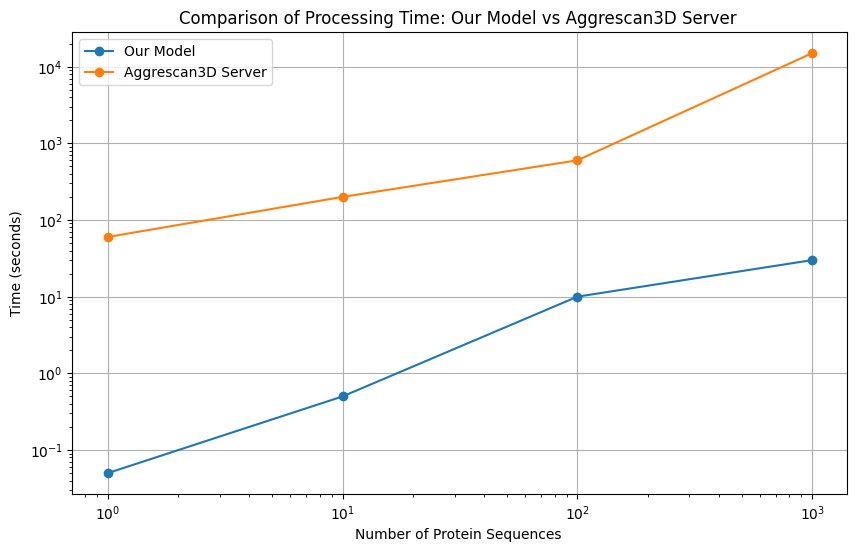

In [117]:
import matplotlib.pyplot as plt

# Data for your deep learning model
x_model = [1, 10, 100, 1000]
y_model = [0.05, 0.5, 10, 30]

# Data for Aggrescan3D server
x_aggrescan = [1, 10, 100, 1000]
y_aggrescan = [60, 200, 600, 15000]

# Create the plot with log scale
plt.figure(figsize=(10, 6))
plt.plot(x_model, y_model, label='Our Model', marker='o')
plt.plot(x_aggrescan, y_aggrescan, label='Aggrescan3D Server', marker='o')

# Set log scale for both axes
plt.xscale('log')
plt.yscale('log')

# Labeling the axes
plt.xlabel('Number of Protein Sequences ')
plt.ylabel('Time (seconds)')
plt.title('Comparison of Processing Time: Our Model vs Aggrescan3D Server ')

# Adding a legend
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()
